Load twitter sentiment data

In [2]:
#using nasdaq 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
plt.style.use('ggplot')

In [3]:
data_folder = './sentiment_data.csv'
df = pd.read_csv(data_folder)
df.head()

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN


In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [5]:
df = df.set_index(['date','symbol'])
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [6]:
df.head()

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN

In [7]:
df['engagement'] = df['twitterComments'].div(df['twitterLikes'])
df  #this is to check for bot activity 

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement  
date       symbol                                                    
2021-11-18 AAPL             7981808.0               NaN    0.119590  
           ABT                64089.0               NaN    0.230769  
           AMD              1645270.0               NaN    0.228891  
           AMZN             5590695.0               NaN    0.101396  
           ATVI             1310715.0               NaN    0.274809  
...                               ...               ...         ...  
2023-01-04 TMO                30857.0          0.610020    0.062500  
           TSLA            55464921.0          0.543057    0.141893  
           TSN                57207.0          0.561900    0.365217  
           V                 139835.0          0.567286    0.169611  
           XOM               483389.0          0.588914    0.180589  

[27235 rows x 6 columns]

In [8]:
df = df[(df['twitterComments']>20) & (df['twitterLikes']>20)]
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement  
date       symbol                                                    
2021-11-18 AAPL             7981808.0               NaN    0.119590  
           AMD              1645270.0               NaN    0.228891  
           AMZN             5590695.0               NaN    0.101396  
           ATVI             1310715.0               NaN    0.274809  
           BA                425847.0               NaN    0.160819  
...                               ...               ...         ...  
2023-01-04 T                 884935.0          0.590457    0.238876  
           TSLA            55464921.0          0.543057    0.141893  
           TSN                57207.0          0.561900    0.365217  
           V                 139835.0          0.567286    0.169611  
           XOM               483389.0          0.588914    0.180589  

[24303 rows x 6 columns]

In [9]:
#calculate avg engagement ratio for every month
agg_df = (df.reset_index('symbol').groupby([pd.Grouper(freq='ME'),'symbol'])[['engagement']].mean())
agg_df

engagement
date       symbol            
2021-11-30 AAL       0.213676
           AAPL      0.256318
           ABBV      0.267943
           ABT       0.235784
           AES       0.864613
...                       ...
2023-01-31 TMO       0.333313
           TSLA      0.151992
           TSN       0.280553
           V         0.194045
           XOM       0.217904

[1103 rows x 1 columns]

In [10]:
#calculate the rank cross sectionally for each month
agg_df['rank'] = agg_df.groupby('date')['engagement']\
                    .transform(lambda x: x.rank(ascending=False))
agg_df

engagement  rank
date       symbol                  
2021-11-30 AAL       0.213676  37.0
           AAPL      0.256318  23.0
           ABBV      0.267943  19.0
           ABT       0.235784  26.0
           AES       0.864613   2.0
...                       ...   ...
2023-01-31 TMO       0.333313  20.0
           TSLA      0.151992  72.0
           TSN       0.280553  31.0
           V         0.194045  61.0
           XOM       0.217904  53.0

[1103 rows x 2 columns]

In [11]:
#select top 5 stocks for each month after ranking
filtered_df = agg_df[agg_df['rank']<6]
filtered_df

engagement  rank
date       symbol                  
2021-11-30 AES       0.864613   2.0
           FCX       0.626323   5.0
           MNST      0.699721   3.0
           OXY       2.147741   1.0
           SLB       0.647374   4.0
...                       ...   ...
2023-01-31 AES       0.533809   4.0
           BIIB      0.839303   1.0
           FCX       0.667387   3.0
           L         0.493916   5.0
           MDT       0.806841   2.0

[75 rows x 2 columns]

In [12]:
filtered_df = filtered_df.reset_index(level=1)
filtered_df.index = filtered_df.index + pd.DateOffset(days=1)
filtered_df

,symbol,engagement,rank
date,,,
2021-12-01,AES,0.864613,2.0
2021-12-01,FCX,0.626323,5.0
2021-12-01,MNST,0.699721,3.0
2021-12-01,OXY,2.147741,1.0
2021-12-01,SLB,0.647374,4.0
...,...,...,...
2023-02-01,AES,0.533809,4.0
2023-02-01,BIIB,0.839303,1.0
2023-02-01,FCX,0.667387,3.0


In [13]:
filtered_df = filtered_df.reset_index().set_index(['date','symbol'])
filtered_df

engagement  rank
date       symbol                  
2021-12-01 AES       0.864613   2.0
           FCX       0.626323   5.0
           MNST      0.699721   3.0
           OXY       2.147741   1.0
           SLB       0.647374   4.0
...                       ...   ...
2023-02-01 AES       0.533809   4.0
           BIIB      0.839303   1.0
           FCX       0.667387   3.0
           L         0.493916   5.0
           MDT       0.806841   2.0

[75 rows x 2 columns]

In [14]:
filtered_df.head(20)

engagement  rank
date       symbol                  
2021-12-01 AES       0.864613   2.0
           FCX       0.626323   5.0
           MNST      0.699721   3.0
           OXY       2.147741   1.0
           SLB       0.647374   4.0
2022-01-01 D         0.801994   5.0
           FCX       0.841220   4.0
           L         6.507246   1.0
           LUV       1.353563   2.0
           MA        0.883401   3.0
2022-02-01 AES       1.084746   2.0
           AMD       0.715556   5.0
           D         1.525919   1.0
           LUV       1.035258   3.0
           MA        0.729063   4.0
2022-03-01 D         0.539383   5.0
           FCX       1.138332   2.0
           LUV       1.574377   1.0
           MRO       0.592924   4.0
           OXY       1.025579   3.0

In [15]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
dates

[Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00')]

In [16]:
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level= 0).index.tolist()
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AES', 'AMD', 'D', 'LUV', 'MA'],
 '2022-03-01': ['D', 'FCX', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['AES', 'J', 'KEY', 'L', 'META'],
 '2022-11-01': ['A', 'DD', 'FCX', 'ILMN', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['AES', 'BIIB', 'FCX', 'L', 'MDT']}

In [17]:
#download prices
stocks = filtered_df.index.get_level_values('symbol').unique().tolist()
stocks

['AES',
 'FCX',
 'MNST',
 'OXY',
 'SLB',
 'D',
 'L',
 'LUV',
 'MA',
 'AMD',
 'MRO',
 'A',
 'CRM',
 'PFE',
 'PM',
 'STZ',
 'CVX',
 'J',
 'KEY',
 'DD',
 'LMT',
 'CB',
 'JPM',
 'REGN',
 'ABT',
 'DIS',
 'META',
 'MRNA',
 'ILMN',
 'AEP',
 'DAL',
 'BIIB',
 'MDT']

In [18]:
price_df = yf.download(tickers=stocks,
                      start='2021-01-01',
                      end='2023-03-01',
                      auto_adjust=False)
price_df

[*********************100%***********************]  32 of 33 completed

1 Failed download:
['MRO']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  32 of 33 completed

Price        Adj Close                                               \
Ticker               A         ABT        AEP        AES        AMD   
Date                                                                  
2021-01-04  115.337723  100.580048  69.613182  19.842178  92.300003   
2021-01-05  116.280708  101.824532  69.519272  20.508141  92.769997   
2021-01-06  119.469406  101.612511  70.074196  21.327782  90.330002   
2021-01-07  122.648399  102.598846  68.204536  21.114334  95.160004   
2021-01-08  123.523346  102.884613  67.598404  21.703451  94.580002   
...                ...         ...        ...        ...        ...   
2023-02-22  139.786163   98.180710  83.843132  22.980520  76.610001   
2023-02-23  140.888062   98.046867  83.741570  22.980520  79.750000   
2023-02-24  138.920349   96.048637  83.483086  22.917162  78.089996   
2023-02-27  139.884521   95.388931  83.150726  22.518915  78.769997   
2023-02-28  139.677902   97.253296  81.212059  22.337898  78.580002   

Price                                                                  ...  \
Ticker            BIIB          CB         CRM         CVX          D  ...   
Date                                                                   ...   
2021-01-04  242.949997  139.992020  218.742615   70.881577  61.402466  ...   
2021-01-05  246.389999  140.104248  219.944000   72.797745  60.662872  ...   
2021-01-06  247.750000  146.770493  214.612213   75.140678  61.959209  ...   
2021-01-07  250.440002  145.723358  216.429184   75.492111  60.629631  ...   
2021-01-08  252.539993  145.293243  220.460312   76.211716  60.829067  ...   
...                ...         ...         ...         ...        ...  ...   
2023-02-22  272.549988  202.982407  162.197800  147.586166  51.428448  ...   
2023-02-23  271.950012  201.763733  162.952377  149.040375  51.054157  ...   
2023-02-24  270.019989  203.998016  161.046036  149.482193  50.795723  ...   
2023-02-27  269.200012  204.742752  161.979340  149.859543  50.198650  ...   
2023-02-28  269.859985  204.104416  162.445999  147.972733  49.565929  ...   

Price         Volume                                                      \
Ticker          META     MNST      MRNA MRO       OXY       PFE       PM   
Date                                                                       
2021-01-04  15106100  6013200  22439600 NaN  18497800  33565700  5389400   
2021-01-05   9871600  5060200  15450800 NaN  37293800  29909400  5282700   
2021-01-06  24354100  7577800  21590900 NaN  37156400  34962500  6376600   
2021-01-07  15789800  6040800  20614100 NaN  24299300  27809500  4824300   
2021-01-08  18528300  6277600  12376900 NaN  18277900  33462400  4035600   
...              ...      ...       ...  ..       ...       ...      ...   
2023-02-22  22433200  3713600   3082500 NaN  17198700  17394200  3518000   
2023-02-23  20017800  3449400   9378900 NaN  12734600  21104300  4327000   
2023-02-24  19791300  4187200   5998700 NaN  13116300  16806100  3561600   
2023-02-27  19277000  3194200   4966000 NaN  17984600  26370300  3862700   
2023-02-28  46051100  5956600   3995000 NaN  34364400  31086900  4976500   

Price                                   
Ticker         REGN       SLB      STZ  
Date                                    
2021-01-04   911100   8743400  1202600  
2021-01-05   797700  16256600  1530200  
2021-01-06  1434700  19456300  1861700  
2021-01-07  1126600  14502400  2537100  
2021-01-08  1018800  11951900  1595400  
...             ...       ...      ...  
2023-02-22   415500   9181100  1092200  
2023-02-23   553300   6324500   979700  
2023-02-24   525900   8458700   702900  
2023-02-27   557100   6287000   608200  
2023-02-28   622700  10634200  1136900  

[542 rows x 198 columns]

In [19]:
return_df = np.log1p(price_df['Adj Close']).diff()

In [20]:
return_df

Ticker,A,ABT,AEP,AES,AMD,BIIB,CB,CRM,CVX,D,...,META,MNST,MRNA,MRO,OXY,PFE,PM,REGN,SLB,STZ
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008073,0.012177,-0.001331,0.031453,0.005025,0.014003,0.000796,0.005452,0.026308,-0.011923,...,0.007492,0.008816,-0.022880,NaN,0.090907,0.009945,0.010699,0.001219,0.049954,0.000688
2021-01-06,0.026826,-0.002064,0.007838,0.037400,-0.026366,0.005482,0.046161,-0.024428,0.031254,0.020805,...,-0.028568,-0.007737,0.062278,NaN,0.038264,-0.008368,0.001314,-0.027965,0.051507,0.030855
2021-01-07,0.026046,0.009566,-0.026658,-0.009606,0.051534,0.010756,-0.007111,0.008392,0.004605,-0.021344,...,0.020335,0.029758,-0.010028,NaN,0.026726,0.004977,0.005716,0.023310,0.018266,0.022652
2021-01-08,0.007051,0.002755,-0.008797,0.026291,-0.006050,0.008317,-0.002936,0.018370,0.009364,0.003231,...,-0.004347,0.015482,-0.020363,NaN,-0.022932,0.001828,0.001305,0.035709,-0.001542,0.005811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009320,-0.009212,-0.000326,-0.006771,-0.002059,0.002269,0.005182,0.010643,-0.004018,-0.006607,...,-0.005562,-0.000479,-0.011990,NaN,-0.023275,-0.007330,-0.003865,0.002085,-0.018350,-0.004427
2023-02-23,0.007796,-0.001350,-0.001198,0.000000,0.039662,-0.002196,-0.005992,0.004613,0.009739,-0.007165,...,0.005331,0.003445,-0.068917,NaN,0.013366,-0.001841,0.002380,0.015341,0.016880,0.015474
2023-02-24,-0.013965,-0.020381,-0.003055,-0.002646,-0.020772,-0.007096,0.010959,-0.011696,0.002940,-0.004977,...,-0.009581,-0.014044,-0.057558,NaN,-0.003991,-0.012749,-0.012460,-0.003516,0.010975,-0.006685


In [21]:
portfolio_df = pd.DataFrame()

In [22]:
for start_date in fixed_dates.keys():
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    cols = fixed_dates[start_date]

    temp_df = return_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return') 

    portfolio_df = pd.concat([portfolio_df,temp_df],axis=0)
    
    # print(start_date,'->',end_date,'::',cols)
    # print(temp_df)
    

In [23]:
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.015970
2021-12-02,0.024040
2021-12-03,-0.007416
2021-12-06,0.023130
2021-12-07,0.029600
...,...
2023-02-22,-0.006280
2023-02-23,-0.008522
2023-02-24,-0.005292


In [24]:
nasdaq = yf.download(tickers='QQQ',
                    start='2021-01-01',
                    end='2023-03-01',
                    auto_adjust=False,
                    multi_level_index=False)
nasdaq

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,301.236206,309.309998,315.290009,305.179993,315.109985,45305900
2021-01-05,303.719666,311.859985,312.140015,308.290009,308.290009,29323400
2021-01-06,299.512329,307.540009,311.880005,305.980011,307.000000,52809600
2021-01-07,306.758209,314.980011,315.839996,310.250000,310.279999,30394800
2021-01-08,310.702454,319.029999,319.390015,315.079987,317.339996,33955800
...,...,...,...,...,...,...
2023-02-22,290.071930,294.250000,296.359985,292.559998,294.619995,51389200
2023-02-23,292.605499,296.820007,298.130005,292.549988,297.970001,69294400
2023-02-24,287.705994,291.850006,292.970001,290.049988,291.760010,74332000


In [25]:
nasdaq_returns = np.log(nasdaq['Adj Close']).diff().to_frame('nasdaq_return')
nasdaq_returns

,nasdaq_return
Date,
2021-01-04,NaN
2021-01-05,0.008210
2021-01-06,-0.013950
2021-01-07,0.023904
2021-01-08,0.012776
...,...
2023-02-22,0.000748
2023-02-23,0.008696
2023-02-24,-0.016886


In [26]:
portfolio_df = portfolio_df.merge(nasdaq_returns,
                                 left_index=True,
                                 right_index=True)
portfolio_df

,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.015970,-0.017159
2021-12-02,0.024040,0.007181
2021-12-03,-0.007416,-0.017541
2021-12-06,0.023130,0.007981
2021-12-07,0.029600,0.029669
...,...,...
2023-02-22,-0.006280,0.000748
2023-02-23,-0.008522,0.008696
2023-02-24,-0.005292,-0.016886


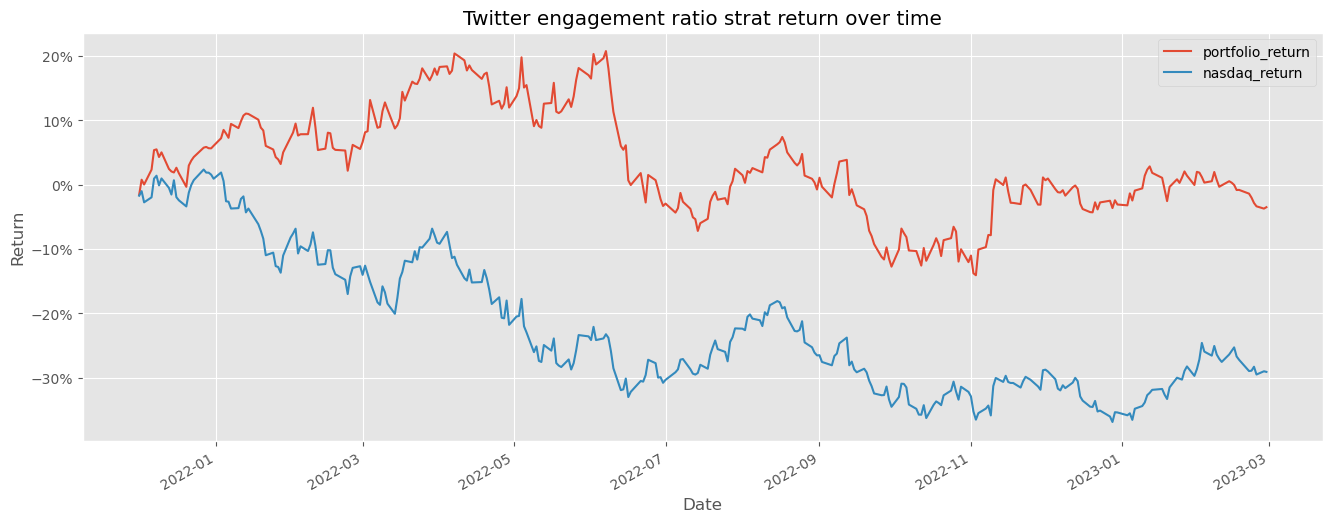

In [27]:
import matplotlib.ticker as mtick
portfolio_cumululative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)
portfolio_cumululative_return.plot(figsize=(16,6))
plt.title('Twitter engagement ratio strat return over time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()